In [1]:
#pip install psycopg2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sklearn import metrics

In [7]:
housing_csv = "https://final-project-data-uci-da-bootcamp.s3-us-west-2.amazonaws.com/train_cleaned_2.csv"
housing_df = pd.read_csv(housing_csv)
housing_df.head()
housing_df.shape
housing_df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'Neighborhood',
       'OverallQual', 'OverallCond', 'Heating', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'SC_Abnorml',
       'SC_AdjLand', 'SC_Alloca', 'SC_Family', 'SC_Normal', 'SC_Partial',
       'SalePrice'],
      dtype='object')

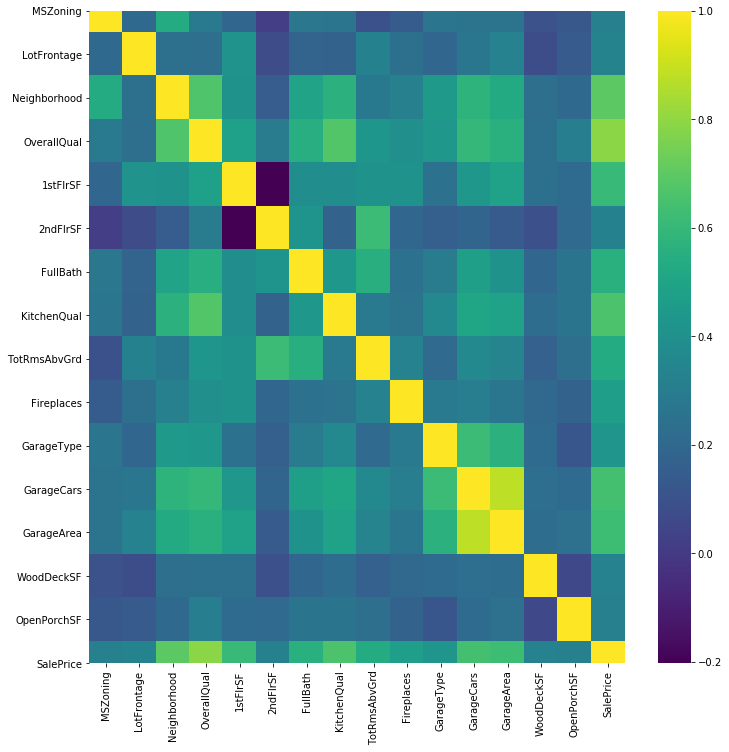

In [8]:
housing_df_selected_items = housing_df[['MSZoning', 'LotFrontage',       
       'Neighborhood', 'OverallQual', '1stFlrSF', '2ndFlrSF',
       'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
fig = plt.figure(figsize= (12,12))
sns.heatmap(housing_df_selected_items.corr(), annot=False, vmax=1, cmap='viridis', square=False)

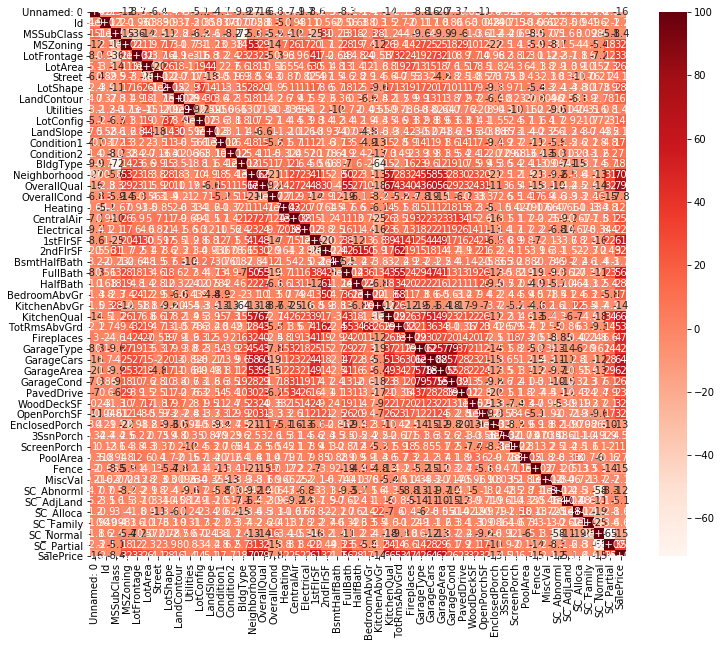

In [9]:
plt.figure(figsize=(12,10))
cor = housing_df.corr()*100
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

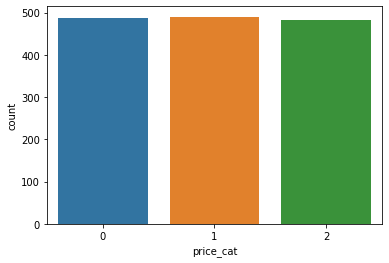

In [10]:
housing_classification = housing_df_selected_items.assign(
    price_cat = pd.qcut(
        housing_df_selected_items['SalePrice'],
        q=3,
        duplicates='drop',
        labels=[0,1,2]
    )
)

# Visualize the Split
sns.countplot(housing_classification['price_cat'])

In [11]:
housing_classification.columns

Index(['MSZoning', 'LotFrontage', 'Neighborhood', 'OverallQual', '1stFlrSF',
       '2ndFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'price_cat'],
      dtype='object')

In [12]:
y = housing_classification['SalePrice']
X = housing_classification[['MSZoning', 'LotFrontage',       
       'Neighborhood', 'OverallQual', '1stFlrSF', '2ndFlrSF', 
       'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF']]

In [13]:
X.head(1)

,MSZoning,LotFrontage,Neighborhood,OverallQual,1stFlrSF,2ndFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,3,65.0,16,7,856,854,2,3,8,0,4.0,2,548,0,61


In [28]:
y.head(1)

0    208500
Name: SalePrice, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_test.shape

(292, 15)

In [16]:
X_train.shape

(1168, 15)

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(f"Training Data Score: {regressor.score(X_train, y_train)}")
print(f"Testing Data Score: {regressor.score(X_test, y_test)}")

Training Data Score: 0.7979954398378284
Testing Data Score: 0.8175465950857099


In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([185773.94943849,  54826.80516324, 195168.09310891, 219269.90738954,
       127710.57471979,  82636.46808701, 272629.96879001, 152810.04778014,
       140433.20837997, 178461.52430809,  36290.66989274, 328038.68564362,
       218906.06400089, 171905.03442402,  47715.44259729,  57643.74262499,
       244354.34612981, 113346.79268132,  87985.02958575, 171533.75193432,
       206083.19413139, 233497.98002669, 112623.63104711,  19034.26120372,
       127323.4488048 , 216735.76847765, 204041.15723577, 166913.95186554,
       206499.00234109, 206484.31574253, 225835.42451441, 128162.51979757,
       105834.60653958, 240696.96881757, 150092.0177016 , 171637.61633243,
       137488.66259569, 204506.44954555, 233876.7407832 , 180248.60091903,
       126190.73894977, 297701.49076423,  59085.51371163, 116146.13475817,
       148788.98740855,  96856.92832087, 136777.78017979, 213594.97386011,
       123148.73357094, 185170.22938143, 246558.19874407,  92350.12271121,
       118476.64548616, 2

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
df1 = df

In [20]:
df1

,Actual,Predicted
892,110000,185773.949438
1105,91000,54826.805163
413,82500,195168.093109
522,159500,219269.907390
1036,143000,127710.574720
...,...,...
479,104000,151506.569374
1361,278000,278407.292012
802,98600,136949.241121
651,132500,116365.172013


## Model Evaluation

In [21]:
 from sklearn.metrics import mean_squared_error

In [22]:
pattern = "%.0f"
y_pred = [pattern % int(i) for i in y_pred]
y_pred = [int(i) for i in y_pred]
mean_squared_error(y_test, y_pred)

1378673588.5958905

In [23]:
from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(y_test,y_pred))

R2 Score:  0.8175460489992927


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 23977.616438356163
Mean Squared Error: 1378673588.5958905
Root Mean Squared Error: 37130.49405267712


## Saving the model to load into Flask

In [26]:
import pickle

In [27]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [29]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[3,65,16,7,856,854,2,3,8,0,4.0,2,548,0,61]]))

[204775.69037898]
